In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from scipy.stats import norm
import seaborn as sns

sns.set_style("dark")

In [5]:
def drawData(X,Y):
    plt.plot(X,Y,'o')
    plt.title("data points")
    plt.xlabel('x',color='#1C2833')
    plt.ylabel('y',color='#1C2833')
    plt.show()


def drawPolynom(X,Y,w, X_m=[], Y_m=[]):
    predicted = np.dot(X,w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title('fitted line')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.show()


def addNoise(Y):
    Y += norm.rvs(size=Y.shape[0])
    return Y


def generatePointsOnLine(shuffle=True, n=100):
    X = np.linspace(-3, 3, n)
    if shuffle:
        np.random.shuffle(X)
    Y = 2*X
    return X,Y


def generateDataset():
    X,Y = generatePointsOnLine()
    Y = addNoise(Y)
    drawData(X,Y)
    return X,Y

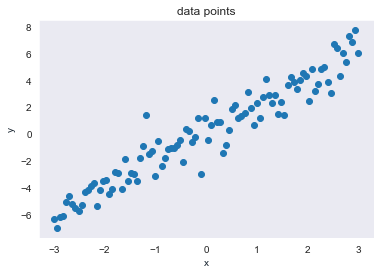

In [27]:
X_gen, Y = generateDataset()

In [32]:
X_gen # выборка x (признаки)

array([-2.27272727,  1.78787879, -0.21212121,  2.87878788,  0.27272727,
       -1.66666667, -1.48484848,  2.45454545, -1.36363636, -2.39393939,
       -1.24242424, -2.6969697 , -0.39393939,  0.75757576, -2.33333333,
        0.45454545, -1.12121212, -1.60606061,  2.57575758, -0.87878788,
        0.03030303, -2.75757576, -1.54545455, -0.63636364,  2.51515152,
       -1.90909091, -1.18181818,  0.39393939,  1.        ,  0.81818182,
        2.09090909,  2.27272727, -2.09090909,  2.15151515, -2.51515152,
        1.72727273,  2.93939394, -2.57575758, -1.72727273,  0.51515152,
       -0.75757576, -2.93939394,  0.93939394, -1.06060606, -0.81818182,
        2.75757576, -2.63636364, -0.03030303, -0.45454545,  2.33333333,
        0.57575758,  1.48484848, -2.87878788,  1.18181818, -1.3030303 ,
       -1.42424242,  3.        , -1.96969697,  0.21212121,  1.84848485,
        2.03030303,  1.66666667,  2.81818182, -1.84848485,  1.12121212,
       -0.51515152,  2.63636364,  0.09090909,  1.54545455,  1.24

In [8]:
Y # выборка y (ответы)

array([ 3.70685572, -2.18200421, -2.40418522, -0.51162531,  0.07886583,
        1.65888905, -0.64932228, -1.59266345,  4.58673022, -0.4064111 ,
       -4.55509162, -4.28920399,  4.12480699,  3.44793198,  3.58792559,
        4.38345057, -3.61852114,  0.21628615, -1.83160028, -1.9208402 ,
       -3.68795402,  1.82615275,  1.8416503 , -1.58531122, -0.26366052,
        3.25350678,  6.30159477,  4.27424869, -2.24845528, -5.27034979,
        4.48439496, -2.1240812 ,  1.28466142, -1.23720643,  2.81668274,
       -5.16995396,  0.37496193,  4.9471858 ,  5.30506833,  4.59459238,
       -4.01544393,  2.28370039, -5.55127313,  3.00271799, -5.9135348 ,
       -1.49491636, -2.53773196,  5.00273066, -3.51369662,  0.84451571,
       -5.64959919, -3.62322251, -2.38436857,  1.52729146,  4.64043109,
        2.11598662,  7.18566154, -1.93686082,  6.63370078,  5.78456435,
       -2.89097648, -2.27863175, -2.43645919,  1.1816915 ,  5.99054177,
       -2.86141847, -1.41747583, -0.33328441, -3.56701275,  3.12

In [9]:
X_gen.shape

(100,)

In [10]:
Y.shape

(100,)

In [38]:
# Данная строчка убирает проблемы с размерностью, если использовать библиотеку sklearn
X_gen = X_gen.reshape(-1, 1)

Задание № 1. С помощью библиотеки sklearn нарисуйте линию. Используйте модуль Linear Regression.  

In [11]:
from sklearn.linear_model import LinearRegression

1) from sklearn.linear_model import LinearRegression  
2) Создайте модель  
3) Обучите модель  
4) Предскажите моделью данные, подав на вход X_gen  
5) Попробуйте нарисовать получившуюся линию

In [21]:
model = LinearRegression()
model.fit(X_gen, Y)

LinearRegression()

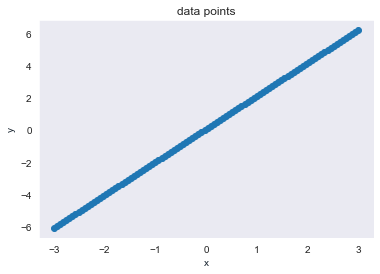

In [25]:
drawData(X_gen, model.predict(X_gen))

!(Задание со звездочкой № 2)! Обучите модель с помощью библиотеки NumPy (не использовав sklearn). Найдите веса по этой формуле, а затем умножение матриц X * w даст вам предсказание модели, попробуйте нарисовать эту линию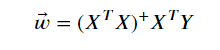(Закоментируйте строчку X_gen.reshape, чтобы избежать проблем с размерностями, а также погуглите про linalg.inv (псевдоинверс в матрице)) 

In [41]:
XT = np.transpose(X_gen)
w = np.dot(XT, X_gen) + np.dot(XT, Y)
Y_predict = np.dot(X_gen, w)

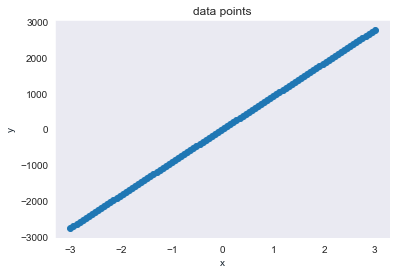

In [42]:
drawData(X_gen, Y_predict)